<a href="https://colab.research.google.com/github/textnorms/date_text_norm/blob/DS-en/T5_V9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! nvidia-smi

Sat May 30 23:56:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    34W /  70W |   2549MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# ! rm -rf date*
# ! git clone https://github.com/textnorms/date_text_norm.git
# ! cp -r date_text_norm/syntetic_data/ .

! pip install -q num2words transformers
! pip install -q transformers

     |████████████████████████████████| 102kB 5.7MB/s 
     |████████████████████████████████| 665kB 8.5MB/s 
     |████████████████████████████████| 890kB 20.2MB/s 
     |████████████████████████████████| 1.1MB 24.6MB/s 
     |████████████████████████████████| 3.8MB 25.8MB/s 


# aux_dicts

In [0]:
'''
    Este arquivo contêm dicionários auxiliares para a construção
    de datas por extenso em EN. Em especial meses.
'''

'''
    Meses escritos por extenso
'''
extensive_months_dict = {
    '01': 'january',
    '02': 'february',
    '03': 'march',
    '04': 'april',
    '05': 'may',
    '06': 'june',
    '07': 'july',
    '08': 'august',
    '09': 'september',
    '10': 'october',
    '11': 'november',
    '12': 'december'
}

'''
    Meses escritos por extenso abreviados
    para EN.
'''
shortened_months_dict = {
    '01': 'jan',
    '02': 'feb',
    '03': 'mar',
    '04': 'apr',
    '05': 'may',
    '06': 'jun',
    '07': 'jul',
    '08': 'aug',
    '09': 'sep',
    '10': 'oct',
    '11': 'nov',
    '12': 'dec'
}

'''
    Dicionário para simular erros de OCR, dde modo que letras
    semelhantes podem ser trocadas por números similares ou letras
    que possuem formato parecido podem ser trocadas entre-si.
'''
lookalike_chars = {
    'o':'0',
    '0':'o',
    'c':'ç',
    'ç':'c',
    'l':'i',
    'i':'l',
    'n':'m',
    'm':'n',
    'u':'v',
    'v':'u'
}

# Data text formats

In [0]:
'''
    Este arquivo é responsável por especificar os formatos de dados que serão considerados
    por default para a geração de novos textos. 
    
    - A inclusão de novos formatos necessita apenas de declarar a função responsável pela sua
    geração e em seguida passar para o dicionário 'date_formats_dict' o nome da função
'''

from num2words import num2words
# from .aux_dicts import extensive_months_dict
# from .aux_dicts import shortened_months_dict

def all_extensive_numbers(day,month,year):
    '''
        Todos os dias em notação por extenso:
        E.g.:
        - um do um de dois mil
    '''
    input_day = num2words(int(day),lang='en')
    input_month = num2words(int(month),lang='en')
    input_year = num2words(int(year),lang='en')
    return f'{input_day} of {input_month} of {input_year}'

def dot_as_sep(day,month,year):
    '''
        Alterando o separador
        para um ponto ao invés do / 
    '''
    return f'{day}.{month}.{year}'

def text_fullmonth_text(day,month,year):
    '''
        Dia e ano escritos por extenso e mês
        escrito como o mês por extenso.
    '''
    input_day = num2words(int(day),lang='en')
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')
    return f'{input_day} of {input_month} of {input_year}'

def text_shortmonth_text(day,month,year):
    '''
        Dia e ano escritos por extenso e mês
        escrito como o mês abreviado.
    '''
    input_day = num2words(int(day),lang='en')
    input_month = shortened_months_dict[month]
    input_year = num2words(int(year),lang='en')
    return f'{input_day} of {input_month} of {input_year}'

def format1(day,month,year):
    '''
        Date format 1 described as:
        "vinte e oito de abril de 2005" for the date 28/04/2005
    '''
    input_day = num2words(int(day),lang='en')
    input_month = extensive_months_dict[month]
    input_year = year
    return f'{input_day} of {input_month} of {input_year}'

def format2(day,month,year):
    '''
        Date format 2 described as:
        "vinte e oito de abr de dois mil e cinco" for the date 28/04/2005
    '''
    input_day = num2words(int(day),lang='en')
    input_month = shortened_months_dict[month]
    input_year = num2words(int(year),lang='en')
    return f'{input_day} of {input_month} of {input_year}'

def format3(day,month,year):
    '''
        Date format 3 described as:
        "vinte e oito de abril de dois mil e cinco" for the date 28/04/2005
    '''
    input_day = num2words(int(day),lang='en')
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')
    return f'{input_day} of {input_month} of {input_year}'

def format4(day,month,year):
    '''
        Date format 4 described as:
        "vigésimo oitavo dia do mês quatro de dois mil e cinco" for the date 28/04/2005
    '''
    input_day = num2words(int(day),to='ordinal',lang='en')
    input_month = num2words(int(month),lang='en')
    input_year = num2words(int(year),lang='en')
    return f'{input_day} day of month {input_month} of {input_year}'

def format5(day,month,year):
    '''
        Date format 5 described as:
        "28 de Abril de 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = extensive_months_dict[month].capitalize()
    input_year = year
    return f'{input_day} of {input_month} of {input_year}'

def format6(day,month,year):
    '''
        Date format 6 described as:
        "28 de abril de dois mil e cinco" for the date 28/04/2005
    '''
    input_day = day
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')
    return f'{input_day} of {input_month} of {input_year}'

def format7(day,month,year):
    '''
        Date format 7 described as:
        "28-04 de dois mil e cinco" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = num2words(int(year),lang='en')
    return f'{input_day}-{input_month} of {input_year}'

def format8(day,month,year):
    '''
        Date format 8 described as:
        "vinte e oito - 04 - 2005" for the date 28/04/2005
    '''
    input_day = num2words(int(day),lang='en')
    input_month = month
    input_year = year
    return f'{input_day} - {input_month} - {input_year}'

def format9(day,month,year):
    '''
        Date format 9 described as:
        "vinte e oito de abril - 2005" for the date 28/04/2005
    '''
    input_day = num2words(int(day),lang='en')
    input_month = extensive_months_dict[month]
    input_year = year
    return f'{input_day} of {input_month} - {input_year}'

def format10(day,month,year):
    '''
        Date format 10 described as:
        "28th de abril de 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = extensive_months_dict[month]
    input_year = year
    
    if input_day == 1 or input_day == '01' or input_day == '1':
        return f'{input_day}st of {input_month} of {input_year}'
    elif input_day == 2 or input_day == '02' or input_day == '2':
        return f'{input_day}nd of {input_month} of {input_year}'
    elif input_day == 3 or input_day == '03' or input_day == '3':
        return f'{input_day}rd of {input_month} of {input_year}'
    else:
        return f'{input_day}th of {input_month} of {input_year}'

def format11(day,month,year):
    '''
        Date format 11 described as:
        "28th - 04 - 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = year
    
    if input_day == 1 or input_day == '01' or input_day == '1':
        return f'{input_day}st-{input_month}-{input_year}'
    elif input_day == 2 or input_day == '02' or input_day == '2':
        return f'{input_day}nd-{input_month}-{input_year}'
    elif input_day == 3 or input_day == '03' or input_day == '3':
        return f'{input_day}rd-{input_month}-{input_year}'
    else:
        return f'{input_day}th-{input_month}-{input_year}'

def format12(day,month,year):
    '''
        Date format 12 described as:
        "28th / 04 / 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = year

    if input_day == 1 or input_day == '01' or input_day == '1':
        return f'{input_day}st/{input_month}/{input_year}'
    elif input_day == 2 or input_day == '02' or input_day == '2':
        return f'{input_day}nd/{input_month}/{input_year}'
    elif input_day == 3 or input_day == '03' or input_day == '3':
        return f'{input_day}rd/{input_month}/{input_year}'
    else:
        return f'{input_day}th/{input_month}/{input_year}'

def format13(day,month,year):
    '''
        Date format 13 described as:
        "28th / Abril / 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = extensive_months_dict[month].capitalize()
    input_year = year

    if input_day == 1 or input_day == '01' or input_day == '1':
        return f'{input_day}st/{input_month}/{input_year}'
    elif input_day == 2 or input_day == '02' or input_day == '2':
        return f'{input_day}nd/{input_month}/{input_year}'
    elif input_day == 3 or input_day == '03' or input_day == '3':
        return f'{input_day}rd/{input_month}/{input_year}'
    else:
        return f'{input_day}th/{input_month}/{input_year}'

def format14(day,month,year):
    '''
        Date format 14 described as:
        "28 / abril / 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = extensive_months_dict[month]
    input_year = year
    return f'{input_day}/{input_month}/{input_year}'

def format15(day,month,year):
    '''
        Date format 15 described as:
        "vinte e oito abril dois mil e cinco" for the date 28/04/2005
    '''
    input_day = num2words(int(day), lang='en')
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')
    return f'{input_day} {input_month} {input_year}'

def format16(day,month,year):
    '''
        Date format 16 described as:
        "28 abril dois mil e cinco" for the date 28/04/2005
    '''
    input_day = day
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')
    return f'{input_day} {input_month} {input_year}'

def format17(day,month,year):
    '''
        Date format 17 described as:
        "28/04 dois mil e cinco" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = num2words(int(year),lang='en')
    return f'{input_day}/{input_month} {input_year}'

def format18(day,month,year):
    '''
        Date format 18 described as:
        "28.04 dois mil e cinco" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = num2words(int(year),lang='en')
    return f'{input_day}.{input_month} {input_year}'


def format19(day,month,year):
    '''
        Date format 19 described as:
        "28-04 dois mil e cinco" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = num2words(int(year),lang='en')
    return f'{input_day}-{input_month} {input_year}'


def format20(day,month,year):
    '''
        Date format 20 described as:
        "vinte e oito/abril/dois mil e cinco" for the date 28/04/2005
    '''
    input_day = num2words(int(day),lang='en')
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')
    return f'{input_day}/{input_month}/{input_year}'

def format21(day,month,year):
    '''
        Date format 21 described as:
        "28 do mês quatro de 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = num2words(int(month),lang='en')
    input_year = year
    return f'{input_day} of month {input_month} of {input_year}'

def format22(day,month,year):
    '''
        Date format 22 described as:
        "28-4-2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = int(month)
    input_year = year
    return f'{input_day}-{input_month}-{input_year}'

def format23(day,month,year):
    '''
        Date format 23 described as:
        "28 - 4 - 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = int(month)
    input_year = year
    return f'{input_day} - {input_month} - {input_year}'

def format24(day,month,year):
    '''
        Date format 24 described as:
        "28-04-2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = year
    return f'{input_day}-{input_month}-{input_year}'

def format25(day,month,year):
    '''
        Date format 25 described as:
        "28 - 04 - 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = year
    return f'{input_day} - {input_month} - {input_year}'

def format26(day,month,year):
    '''
        Date format 26 described as:
        "28-abril-2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = extensive_months_dict[month]
    input_year = year
    return f'{input_day}-{input_month}-{input_year}'

def format27(day,month,year):
    '''
        Date format 27 described as:
        "28 - abril - 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month =  extensive_months_dict[month]
    input_year = year
    return f'{input_day} - {input_month} - {input_year}'

def format28(day,month,year):
    '''
        Date format 28 described as:
        "28-abr-2005" for the date 28/04/2005
    '''
    input_day = day
    input_month =  shortened_months_dict[month]
    input_year = year
    return f'{input_day}-{input_month}-{input_year}'

def format29(day,month,year):
    '''
        Date format 29 described as:
        "28 - abr - 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month =  shortened_months_dict[month]
    input_year = year
    return f'{input_day} - {input_month} - {input_year}'

def format30(day,month,year):
    '''
        Date format 30 described as:
        "28.4.2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = int(month)
    input_year = year
    return f'{input_day}.{input_month}.{input_year}'

def format31(day,month,year):
    '''
        Date format 31 described as:
        "28 . 4 . 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = int(month)
    input_year = year
    return f'{input_day} . {input_month} . {input_year}'

def format32(day,month,year):
    '''
        Date format 32 described as:
        "28.04.2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = year
    return f'{input_day}.{input_month}.{input_year}'

def format33(day,month,year):
    '''
        Date format 33 described as:
        "28 . 04 . 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = year
    return f'{input_day} . {input_month} . {input_year}'

def format34(day,month,year):
    '''
        Date format 34 described as:
        "28.abril.2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = extensive_months_dict[month]
    input_year = year
    return f'{input_day}.{input_month}.{input_year}'

def format35(day,month,year):
    '''
        Date format 35 described as:
        "28 . abril . 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = extensive_months_dict[month]
    input_year = year
    return f'{input_day} . {input_month} . {input_year}'

def format36(day,month,year):
    '''
        Date format 36 described as:
        "28.abr.2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = shortened_months_dict[month]
    input_year = year
    return f'{input_day}.{input_month}.{input_year}'

def format37(day,month,year):
    '''
        Date format 37 described as:
        "28 . abr . 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = shortened_months_dict[month]
    input_year = year
    return f'{input_day} . {input_month} . {input_year}'

def format38(day,month,year):
    '''
        Date format 38 described as:
        "28/04/2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = year
    return f'{input_day}/{input_month}/{input_year}'

def format39(day,month,year):
    '''
        Date format 39 described as:
        "28 / 04 / 2005" for the date 28/04/2005
    '''
    input_day = day
    input_month = month
    input_year = year
    return f'{input_day} / {input_month} / {input_year}'

def format40(day,month,year):
    '''
        Date format 40 described as:
        "28 / abril / 2005" for the date 28/04/2005
    '''
    input_day = int(day)
    input_month = extensive_months_dict[month]
    input_year = int(year)
    return f'{input_day}/{input_month}/{input_year}'

def format41(day,month,year):
    '''
        Date format 41 described as:
        "28 / abril / 2005" for the date 28/04/2005
    '''
    input_day = int(day)
    input_month = extensive_months_dict[month]
    input_year = int(year)
    return f'{input_day} / {input_month} / {input_year}'

def format42(day,month,year):
    '''
        Date format 42 described as:
        "28/abr/2005" for the date 28/04/2005
    '''
    input_day = int(day)
    input_month = shortened_months_dict[month]
    input_year = int(year)
    return f'{input_day}/{input_month}/{input_year}'

def format43(day,month,year):
    '''
        Date format 43 described as:
        "28 / abr / 2005" for the date 28/04/2005
    '''
    input_day = int(day)
    input_month = shortened_months_dict[month]
    input_year = int(year)
    return f'{input_day} / {input_month} / {input_year}'

def format44(day,month,year):
    '''
        Date format 44 described as:
        "28/4/2005" for the date 28/04/2005
    '''
    input_day = int(day)
    input_month = int(month)
    input_year = int(year)
    return f'{input_day}/{input_month}/{input_year}'

def format45(day,month,year):
    '''
        Date format 45 described as:
        "28 / 4 / 2005" for the date 28/04/2005.
    '''
    input_day = int(day)
    input_month = int(month)
    input_year = int(year)
    return f'{input_day} / {input_month} / {input_year}'

'''
    Não se esqueça de incluir aqui as funções declaradas para gerar datas completas.
'''
date_formats_dict = {
    '1':format1,
    '2':format2,
    '3':format3,
    '4':format4,
    '5':format5,
    '6':format6,
    '7':format7,
    '8':format8,
    '9':format9,
    '10':format10,
    '11':format11,
    '12':format12,
    '13':format13,
    '14':format14,
    '15':format15,
    '16':format16,
    '17':format17,
    '18':format18,
    '19':format19,
    '20':format20,
    '21':format21,
    '22':format22,
    '23':format23,
    '24':format24,
    '25':format25,
    '26':format26,
    '27':format27,
    '28':format28,
    '29':format29,
    '30':format30,
    '31':format31,
    '32':format32,
    '33':format33,
    '34':format34,
    '35':format35,
    '36':format36,
    '37':format37,
    '38':format38,
    '39':format39,
    '40':format40,
    '41':format41,
    '42':format42,
    '43':format43,
    '44':format44,
    '45':format45,
}

# Text noises

In [0]:
'''
    Este arquivo implementa a criação de ruído para entradas de texto, 
    como é o caso de erros de caracteres parecidos ou caracteres faltantes.
'''

# from .aux_dicts import lookalike_chars
from random import sample
from collections import OrderedDict

def findAllOccurrences(s, ch):
    '''
        Encontra todas as ocorrências de uma letra em uma dada
        string. Código copiado de:
        https://stackoverflow.com/questions/13009675/find-all-the-occurrences-of-a-character-in-a-string
    '''
    return [i for i, letter in enumerate(s) if letter == ch]

def lookalike_replace_noise(input_text,K):
    '''
        Essa função troca K caracteres de uma string por caracteres que
        podem ser semelhantes dadas algumas fontes específicas.
    '''
    
    # Procurando dentre os caracteres que ocorrem, quais são
    # os que são candidatos à serem trocados
    chars_to_replace = list(lookalike_chars.keys())
    
    replace_candidates = OrderedDict()

    for char in chars_to_replace:

        char_occurencies = findAllOccurrences(input_text,char)

        if len(char_occurencies) > 0: replace_candidates[char] = char_occurencies

    # Alterando estes caracteres de forma aleatória
    K_counter = 0
    input_text_as_list = list(input_text)
    
    while(K_counter < K):

        candidate_chars = list(replace_candidates.keys())
        
        try:
            char2replace = sample(candidate_chars,1)[0]
        except:
            break

        locations = replace_candidates[char2replace]

        try:
            location_to_replace = sample(locations,1)[0]
        except:
            continue

        # Removing the just used key 
        locations.remove(location_to_replace)

        # Obtaining the new char from char2replpace dict
        new_char = lookalike_chars[char2replace]


        if len(locations) < 1:
            # Removing key if has no more locations
            replace_candidates.pop(char2replace,None)

        # Inserting new char to target string
        input_text_as_list[location_to_replace] = new_char
        
        # Counter incrementing
        K_counter += 1
    
    return "".join(input_text_as_list)


def unexpected_space_noise(input_text,K):
    '''
        Given an input text, k random spaces will
        be inserted between non space chars, creating
        noisy texts with random splitting.
    '''
    # Initializinng counter and creating aux variable
    K_count = 0
    new_text = input_text
    
    while(K_count<K):
        # Obtaining the split point for the string
        split_point = sample(range(len(new_text)),1)[0]

        # Skipping operation the if value is a ' ' or is the beggining or the end of seq
        if new_text[split_point] == ' ' or split_point==0 or split_point == len(text_noise_dict):
            
            continue
        
        # Spliting list to insert noise data
        new_text = new_text[:split_point] + ' ' + new_text[split_point:]
        
        K_count+=1

    return new_text


def remove_char_noise(input_text,K):
    '''
        This function removes K random chars from the text input.
    '''
    # Converting the input to a list to
    # allow removing chars
    input_text_as_list = list(input_text)
    
    for k in range(K):
        index_to_remove = sample(range(len(input_text_as_list)),1)[0]
        
        del input_text_as_list[index_to_remove]

    return "".join(input_text_as_list)


'''
    This dict exports all the implemented noise
    functions implemented in this file for
    further usage on the main class
'''
text_noise_dict = {
    'lookalike_replace_noise':lookalike_replace_noise,
    'unexpected_space_noise':unexpected_space_noise,
    'remove_char_noise':remove_char_noise
}

# Date text generator

In [0]:
from num2words import num2words
from datetime import datetime
from datetime import timedelta
import pandas as pd
from random import random
from random import randint
from random import sample
from .text_noise import text_noise_dict
from .date_text_formats import date_formats_dict

class DateTextGenerator():

    '''
    Essa classe implementa um gerador de texto sintético
    que usa como entrada datas no formato canônico e produz
    amostras em formatos textuais não canônicos. 
    E.g.:
        - Entrada: 01/05/2020
        - Saídas possíveis:
            - 01 de maio de 2020;
            - primeiro de maior de 2020;
            - primeiro de maio de dois mil e vinte;
            - primeiro do 05 de 2020;
                .
                .
                .
    '''
    def __init__(self,start_date='01/01/0001',
        end_date='31/12/2999',
        text_noise_rate=0.0,
        max_noise_types_per_sample=3,
        max_noise_occurences_per_sample = 2,
        text_gen_methods=date_formats_dict,
        text_noise_methods=text_noise_dict):

        self.start_date = datetime.strptime(start_date, "%d/%m/%Y")
        self.end_date = datetime.strptime(end_date, "%d/%m/%Y")

        self.date_range = self.generate_date_range(self.start_date,self.end_date)

        self.text_gen_methods = text_gen_methods

        self.text_error_rate = text_noise_rate
        self.text_noise_methods = text_noise_methods

        self.max_noise_occurences_per_sample = max_noise_occurences_per_sample
        self.max_noise_types_per_sample = max_noise_types_per_sample

    def generate_date_dataset(self):

        X = []
        method_ids = []
        noise_types = [] # N/A if has no noise, or the keys from text_noise_implementations

        for sample in self.date_range:
            
            # Sampling method and its ids
            method_id,date_text_gen_method = self.sample_from_dict(self.text_gen_methods)[0]

            day,month,year = sample.split('/')
            
            method_ids.append(
                int(method_id)
            )

            text_sample = date_text_gen_method(day,month,year)

            noise_type = 'N/A'

            if random.random() < self.text_error_rate:
                # Applying noise
                text_sample,noise_type = self._apply_noise(text_sample)
            
            noise_types.append(
                noise_type    
            )

            X.append(
                text_sample
            )

        dataset = pd.DataFrame(list(zip(method_ids,noise_types,X,self.date_range)),
            columns=['Input Pattern','Noise Type','Input','Target'])

        return dataset

    def generate_demo(self,date='01/01/2020'):
        '''
            Generates a demo for all the text forms
            contained in the model for a given date.
        '''        
        methods = []
        generated_texts = []

        day,month, year = date.split('/')

        for method_id,date_text_gen_method in self.text_gen_methods.items():
        
            methods.append(method_id)
            generated_texts.append(date_text_gen_method(day,month,year))


        dataset = pd.DataFrame(list(zip(methods,generated_texts,[date]*len(self.text_gen_methods))),
            columns=['Input Pattern','Generated Text','Origin Sample'])

        return dataset

    def _apply_noise(self,input_text):
        '''
            Selects a random noise type and apply it to
            input_text. This function returns input_text
            with noise and the noise type applied.
        '''
        
        # Introducing some randomness to the proccess of selecting
        # the number of samples
        noise_types = randint(1,self.max_noise_types_per_sample)
        
        # This list will keep track of the noises applied to 
        # each sample and will be used to included to the final
        # dataframe 
        applied_noises = []

        for noise_type in sample(list(self.text_noise_methods.keys()),noise_types):
            noise_func = self.text_noise_methods[noise_type]
            
            # Defining the number of occurrences per sample
            noise_occurrences = randint(1,self.max_noise_occurences_per_sample)

            # Applying noise to multi samples
            input_text  = noise_func(input_text,noise_occurrences)

            applied_noises.append(noise_type)


        return input_text,applied_noises

    @staticmethod
    def sample_from_dict(dict_to_sample,n_samples=1):
        '''
            This method implements a form of sampling n_samples from
            a dict. This is code was inspired in the implementation
            described in:
            https://stackoverflow.com/questions/10125568/how-to-randomly-choose-multiple-keys-and-its-value-in-a-dictionary-python
        '''

        # Sampling n_samples keys
        keys_and_values = sample(dict_to_sample.items(), n_samples)
        
        # Returns the values and the keys corresponding
        # each sampled value
        return keys_and_values

    @staticmethod
    def generate_date_range (start_date,end_date,step=1):
        '''
           Implementa um range de datas com os dias que estão entre
           start_date e end_date. Implementação inspirada em:
            https://gist.github.com/ramhiser/989263a7a136601e3723
            e
            https://stackoverflow.com/questions/339007/how-to-pad-zeroes-to-a-string
        '''
        
        dates = []

        for d in range(0, (end_date - start_date).days + step, step):
            date_i = start_date + timedelta(days=d)
            
            dia = str(date_i.date().day).zfill(2)
            mes = str(date_i.date().month).zfill(2)
            ano = str(date_i.date().year).zfill(4)

            dates.append(f'{dia}/{mes}/{ano}')

        return dates

# Libs

In [0]:
# Basics
import numpy as np
import pandas as pd
import random

# Synthetic data generator
# from syntetic_data import DateTextGenerator

# PyTorch
import torch 
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# Sklearn
from sklearn.model_selection import train_test_split

# Transformers
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW

# Matplot lib
import matplotlib.pyplot as plt

### Deterministic experiments

In [0]:
manual_seed = 2357 # only primes, cuz I like
def deterministic(rep=True):
    if rep:
        np.random.seed(manual_seed)
        torch.manual_seed(manual_seed)
        if torch.cuda.is_available():
            torch.cuda.manual_seed(manual_seed)
            torch.cuda.manual_seed_all(manual_seed)
        torch.backends.cudnn.enabled = False 
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
        print(f'Deterministic experiment, seed: {manual_seed}')
    else:
        print('Random experiment')

deterministic()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Deterministic experiment, seed: 2357
Using device: cuda


# Config constants

In [0]:
# Model params
MODEL_SZ = 't5-small' # 't5-base'
TOK = T5Tokenizer.from_pretrained(MODEL_SZ)
MAX_LEN_SRC  = 48
MAX_LEN_TRGT = 12

# Train params
BATCH_SZ = 16
N_EPOCHS = 3
WINDOW   = 7

# Dataset

In [0]:
pd.set_option('display.max_rows',70)

datas = DateTextGenerator(start_date='01/01/1921',
                          end_date='31/12/2120',
                          text_noise_rate=0.3)

examples = datas.generate_demo(date='4/11/1983'); examples

,Input Pattern,Generated Text,Origin Sample
0,1,four of november of 1983,4/11/1983
1,2,"four of nov of one thousand, nine hundred and ...",4/11/1983
2,3,"four of november of one thousand, nine hundred...",4/11/1983
3,4,"fourth day of month eleven of one thousand, ni...",4/11/1983
4,5,4 of November of 1983,4/11/1983
5,6,"4 of november of one thousand, nine hundred an...",4/11/1983
6,7,"4-11 of one thousand, nine hundred and eighty-...",4/11/1983
7,8,four - 11 - 1983,4/11/1983
8,9,four of november - 1983,4/11/1983
9,10,4th of november of 1983,4/11/1983


In [0]:
df = datas.generate_date_dataset(); df

,Input Pattern,Noise Type,Input,Target
0,20,N/A,"one/january/one thousand, nine hundred and twe...",01/01/1921
1,35,N/A,02 . january . 1921,02/01/1921
2,35,"[remove_char_noise, unexpected_space_noise, lo...",03 . jamuary 1 21,03/01/1921
3,2,N/A,"four of jan of one thousand, nine hundred and ...",04/01/1921
4,33,"[remove_char_noise, lookalike_replace_noise, u...",o5 . 01 . 1 921,05/01/1921
...,...,...,...,...
73044,31,N/A,27 . 12 . 2120,27/12/2120
73045,35,N/A,28 . december . 2120,28/12/2120
73046,13,N/A,29th/December/2120,29/12/2120
73047,35,"[lookalike_replace_noise, unexpected_space_noi...",3 de cenber . 2120,30/12/2120


In [0]:
df.shape

(73049, 4)

## Function to split the dataset

In [0]:
def split_data(df, test_size=0.2, verbose=True):
    l = list(set(df['Input Pattern'].values))
    num_test = int(len(l)*test_size)
    test_methods = [random.randint(1, len(l)) for _ in range(num_test)]
    
    df_test = df[df['Input Pattern'].isin(test_methods)]
    x_test = df_test.Input.values
    y_test = df_test.Target.values

    df_train = df[~df['Input Pattern'].isin(test_methods)]

    x_train, x_val, y_train, y_val = train_test_split(
        df_train.Input.values,
        df_train.Target.values,
        shuffle=True, 
        test_size=test_size,
        random_state=manual_seed
        )
    if verbose:
        print(f'Date types of test set: {test_methods} with len: {len(test_methods)}')
        print(f'x_train: {len(x_train)}  --  y_train: {len(y_train)}\n\
x_val:   {len(x_val)}  --  y_val:   {len(y_val)}\n\
x_test:  {len(x_test)}  --  y_test:  {len(y_test)}')

    return x_train, y_train, x_val, y_val, x_test, y_test

# creating sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(df, 
                                                            test_size=0.25, 
                                                            verbose=True)

Date types of test set: [11, 3, 10, 15, 39, 13, 34, 30, 24, 6, 27] with len: 11
x_train: 41463  --  y_train: 41463
x_val:   13822  --  y_val:   13822
x_test:  17764  --  y_test:  17764


In [0]:
class DateDataset(Dataset):
    def __init__(self, data, label, tokenizer, source_max_length, target_max_length):
        self.tokenizer = tokenizer
        self.data = data
        self.label = label
        self.source_max_length = source_max_length
        self.target_max_length = target_max_length
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        source = self.data[idx]
        target = self.label[idx]

        source_tokenized = self.tokenizer.encode_plus(
            f'{source} {self.tokenizer.eos_token}',
            max_length=self.source_max_length,
            pad_to_max_length=True,
            return_tensors='pt')

        target_tokenized = self.tokenizer.encode_plus(
            f'{target} {self.tokenizer.eos_token}',
            max_length=self.target_max_length,
            pad_to_max_length=True,
            return_tensors='pt')

        source_token_ids = source_tokenized['input_ids'].squeeze()
        source_mask = source_tokenized['attention_mask'].squeeze()
        target_token_ids = target_tokenized['input_ids'].squeeze()
        
        return source_token_ids, source_mask, target_token_ids

## Checking the DateDataset class

In [0]:
dataset_debug = DateDataset(
    x_train, 
    y_train,
    TOK,
    MAX_LEN_SRC,
    MAX_LEN_TRGT,
    )

dataloader_checking = DataLoader(
    dataset_debug, 
    batch_size=1, 
    shuffle=True, 
    num_workers=0
    )

source_token_ids, source_mask, target_token_ids = next(iter(dataloader_checking))
print(f'source_token_ids:\n {source_token_ids} --- shape:{source_token_ids.shape}')
print(f'source_mask:\n {source_mask} --- shape:{source_mask.shape}')
print(f'target_token_ids:\n {target_token_ids} --- shape:{target_token_ids.shape}')

source_token_ids:
 tensor([[ 850,    3,   87,  586,    3,   87,  460, 4056,    1,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]]) --- shape:torch.Size([1, 48])
source_mask:
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) --- shape:torch.Size([1, 48])
target_token_ids:
 tensor([[  850, 18009, 20173,  4056,     1,     0,     0,     0,     0,     0,
             0,     0]]) --- shape:torch.Size([1, 12])


## Datasets e Dataloaders

In [0]:
# datasets
ds_debug = DateDataset(x_train[:BATCH_SZ], y_train[:BATCH_SZ], TOK, MAX_LEN_SRC, MAX_LEN_TRGT)
ds_train = DateDataset(x_train, y_train, TOK, MAX_LEN_SRC, MAX_LEN_TRGT)
ds_valid = DateDataset(x_val, y_val, TOK, MAX_LEN_SRC, MAX_LEN_TRGT)
ds_test  = DateDataset(x_test, y_test, TOK, MAX_LEN_SRC, MAX_LEN_TRGT)

print('Datasets len:')
print(f'len ds_debug: {len(ds_debug)}')
print(f'len ds_train: {len(ds_train)}')
print(f'len ds_valid: {len(ds_valid)}')
print(f'len ds_test:  {len(ds_test)}')

# dataloaders
dataloaders = {
    'debug': DataLoader(
         ds_debug,
         batch_size=BATCH_SZ,
         shuffle=True,
         num_workers=2,
         pin_memory=True),
    'train': DataLoader(
         ds_train,
         batch_size=BATCH_SZ,
         shuffle=True,
         num_workers=2,
         pin_memory=True),
    'valid': DataLoader(
         ds_valid,
         batch_size=BATCH_SZ,
         shuffle=False,
         num_workers=2,
         pin_memory=True),
    'test': DataLoader(
         ds_test,
         batch_size=BATCH_SZ,
         shuffle=False,
         num_workers=2,
         pin_memory=True),
               }
# sanity check
print('\nDataloaders len (in batch):')
dl_sizes = {x: len(dataloaders[x]) for x in dataloaders.keys()}; dl_sizes

Datasets len:
len ds_debug: 16
len ds_train: 41463
len ds_valid: 13822
len ds_test:  17764

Dataloaders len (in batch):


{'debug': 1, 'test': 1111, 'train': 2592, 'valid': 864}

In [0]:
# testando o dataloader 
source_token_ids, source_mask, target_token_ids = next(iter(dataloaders['debug']))

In [0]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = T5ForConditionalGeneration.from_pretrained(MODEL_SZ)
    
    def forward(self, token_ids, att_mask, labels):
        outputs = self.model.forward(
            input_ids=token_ids, 
            attention_mask=att_mask,
            lm_labels=labels
            )
        return outputs[0] # loss
    
    @torch.no_grad()    
    def generate(self, token_ids, att_mask, max_len_target):
        predict = self.model.generate(
            input_ids=token_ids, 
            attention_mask=att_mask,
            max_length=max_len_target
            )
        return predict
    
    @torch.no_grad()  
    def generate_example(self, text_input, tokenizer, max_len_source=MAX_LEN_SRC):

        self.model.eval()
        
        example_tokenized = tokenizer.encode_plus(
            f'{text_input} {tokenizer.eos_token}',
            max_length=max_len_source,
            pad_to_max_length=True,
            return_tensors='pt')
            
        example_token_ids = example_tokenized['input_ids']
        example_mask = example_tokenized['attention_mask']

        predicted_example = self.model.generate(
            input_ids=example_token_ids.to(device), 
            attention_mask=example_mask.to(device),
            max_length=MAX_LEN_TRGT
            )

        self.model.train()

        out_text = [tokenizer.decode(text) for text in predicted_example]
        
        return out_text

## Train and evaluation functions

In [0]:
# acc metric for text inputs
def acc_in_text(trues, preds): 
    acc = []
    for d in zip(trues, preds):
        if d[0] == d[1]:
            acc.append(1)
        else:
            acc.append(0)
    return acc # bool

def train(model, device, train_loader, optimizer):
    loss_train = []
    model.train()
    for source_token_ids, source_mask, target_token_ids in train_loader:
        optimizer.zero_grad()
        loss = model(
            source_token_ids.to(device), 
            source_mask.to(device), 
            target_token_ids.to(device)
            )
        
        loss_train.append(loss.item())
        loss.backward()
        optimizer.step()
    
    train_losses = sum(loss_train) / len(loss_train)
  
    return train_losses

def evaluate_fn(model, device, val_loader, max_len=MAX_LEN_TRGT):
    loss_val, all_acc, all_preds, all_trues = [], [], [], []
    model.eval()
    for source_token_ids, source_mask, target_token_ids in val_loader:
        predicted_ids = model.generate(
            source_token_ids.to(device), 
            source_mask.to(device),
            max_len
            )
        
        preds = [TOK.decode(t) for t in predicted_ids]
        trues = [TOK.decode(t) for t in target_token_ids]
        acc = acc_in_text(trues, preds)
        all_acc.extend(acc)
        all_trues.extend(trues)
        all_preds.extend(preds)
        
        # val loss   
        loss = model(
        source_token_ids.to(device), 
        source_mask.to(device), 
        target_token_ids.to(device)
        )
        loss_val.append(loss.item())
    
    val_losses = sum(loss_val) / len(loss_val)
    
    return val_losses, np.array(all_acc).mean(), all_trues, all_preds

# Overfit in one batch 
- dataloader debug

In [0]:
overfit = False

if overfit:

    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    deterministic() 

    model = Net().to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
    
    # -----------------------------------------------------------------------------
    start.record()
    for step in range(1, 1001):
        samp = random.randint(0, BATCH_SZ-WINDOW) # to show random trues and preds
        loss_t = train(model, device, dataloaders['debug'], optimizer)
        acc, trues, preds = evaluate_fn(model, device, dataloaders['debug'])
        if step == 1:
            print(f'[Epoch: {step}/{1000}] |', end=' ')
            print(f'Train Loss: {loss_t:.3f} -- Acc: {acc:.3f}')
        if step % 100 == 0:
            print(f'[Epoch: {step}/{1000}] |', end=' ')
            print(f'Train Loss: {loss_t:.3f} -- Acc: {acc:.3f}')
            print(f'  Trues: {trues[samp:samp+WINDOW]}\n  Preds: {preds[samp:samp+WINDOW]}')
    end.record()
    torch.cuda.synchronize()    
    # -----------------------------------------------------------------------------

    print(f'Training time: {start.elapsed_time(end)/1000/60 :.3f} min.')
    del model

# Training 

In [0]:
# del model
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
deterministic() 

model = Net().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# ---------------------------------------------------------------------------------
start.record()
for step in range(1, N_EPOCHS+1):
    samp = random.randint(0, BATCH_SZ-WINDOW) # to show random trues and preds
    loss_t = train(model, device, dataloaders['train'], optimizer)
    loss_v, acc, trues, preds = evaluate_fn(model, device, dataloaders['valid'])
    print(f'[Epoch: {step}/{N_EPOCHS}] |', end=' ')
    print(f'Train Loss: {loss_t:.3f} -- Valid Loss: {loss_v:.3f} -- Acc: {acc:.3f}')
    print(f'  Trues: {trues[samp:samp+WINDOW]}\n  Preds: {preds[samp:samp+WINDOW]}')

end.record()
torch.cuda.synchronize()    
# ---------------------------------------------------------------------------------

print(f'Training time: {start.elapsed_time(end)/1000/60 :.3f} min.')

Deterministic experiment, seed: 2357
[Epoch: 1/3] | Train Loss: 0.353 -- Valid Loss: 0.080 -- Acc: 0.830
  Trues: ['22/06/2099', '21/12/1959', '06/06/2102', '12/09/2120', '24/01/2110', '13/05/2052', '30/07/1939']
  Preds: ['22/06/2099', '21/12/1959', '06/06/2102', '12/09/2120', '24/01/2110', '13/05/2052', '30/07/1939']
[Epoch: 2/3] | Train Loss: 0.094 -- Valid Loss: 0.050 -- Acc: 0.887
  Trues: ['06/06/2102', '12/09/2120', '24/01/2110', '13/05/2052', '30/07/1939', '13/09/2035', '12/10/1985']
  Preds: ['06/06/2102', '12/09/2120', '24/01/2110', '13/05/2052', '30/07/1939', '13/09/2035', '12/10/1985']
[Epoch: 3/3] | Train Loss: 0.065 -- Valid Loss: 0.039 -- Acc: 0.904
  Trues: ['08/04/2088', '22/06/2099', '21/12/1959', '06/06/2102', '12/09/2120', '24/01/2110', '13/05/2052']
  Preds: ['08/04/2088', '22/06/2099', '21/12/1959', '06/06/2102', '12/09/2120', '24/01/2110', '13/05/2052']
Training time: 15.754 min.


# Test

In [0]:
# ---------------------------------------------------------------------------------
start.record()

samp = random.randint(0, BATCH_SZ-WINDOW) # to show random trues and preds
loss, acc, trues, preds = evaluate_fn(model, device, dataloaders['test'])
print(f'Loss: {loss:.3f} -- Acc: {acc:.3f}')
print(f' Trues: {trues[samp:samp+WINDOW]}\n  Preds: {preds[samp:samp+WINDOW]}')

end.record()
torch.cuda.synchronize()    
# ---------------------------------------------------------------------------------

print(f'Test time: {start.elapsed_time(end)/1000/60 :.3f} min.')

Loss: 0.043 -- Acc: 0.894
 Trues: ['07/01/1921', '09/01/1921', '10/01/1921', '12/01/1921', '13/01/1921', '19/01/1921', '25/01/1921']
  Preds: ['07/01/1921', '09/01/2121', '10/01/1921', '12/01/1921', '13/01/1921', '19/07/1921', '25/01/1921']
Test time: 1.895 min.


# Evaluating types for a same date

Given a sample date, this section evaluates wich is the accuracy.




In [0]:
def evaluate_for_a_same_date(date,model=model,tokenizer=TOK,verbose=True):
  '''
    Given a specific date, returns the accuracy in all evalueated types.
    Also prints results per sample.
  '''

  results = []
  
  examples = datas.generate_demo(date=date)

  for x,target in zip(examples['Generated Text'],examples['Origin Sample']):

    prediction = model.generate_example(x,TOK)[0]

    results.append(prediction == target)

    if verbose:
      print(f'Entrada: {x} -- Target: {target} --- Previsto: {prediction} --- {prediction == target}')


  if verbose:
    print(f'Total accuracy: {np.mean(results)}')

  return np.mean(results)


In [0]:
'''
  A date in the century with more dates occuring
'''

evaluate_for_a_same_date('11/07/1988')

Entrada: eleven of july of 1988 -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: eleven of jul of one thousand, nine hundred and eighty-eight -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: eleven of july of one thousand, nine hundred and eighty-eight -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: eleventh day of month seven of one thousand, nine hundred and eighty-eight -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: 11 of July of 1988 -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: 11 of july of one thousand, nine hundred and eighty-eight -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: 11-07 of one thousand, nine hundred and eighty-eight -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: eleven - 07 - 1988 -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: eleven of july - 1988 -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: 11th of july o

1.0

In [0]:
'''
  A date in a century with less dates occurring, but that is inside the
  generated dataset
'''

evaluate_for_a_same_date('20/12/2015')

Entrada: twenty of december of 2015 -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: twenty of dec of two thousand and fifteen -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: twenty of december of two thousand and fifteen -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: twentieth day of month twelve of two thousand and fifteen -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: 20 of December of 2015 -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: 20 of december of two thousand and fifteen -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: 20-12 of two thousand and fifteen -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: twenty - 12 - 2015 -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: twenty of december - 2015 -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: 20th of december of 2015 -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrad

1.0

In [0]:
'''
  Evaluating for a date in a century out of the training range gives the worst
  acc possible. (0)
'''
evaluate_for_a_same_date('25/12/2141')

Entrada: twenty-five of december of 2141 -- Target: 25/12/2141 --- Previsto: 25/12/241 --- False
Entrada: twenty-five of dec of two thousand, one hundred and forty-one -- Target: 25/12/2141 --- Previsto: 25/12/241 --- False
Entrada: twenty-five of december of two thousand, one hundred and forty-one -- Target: 25/12/2141 --- Previsto: 25/12/241 --- False
Entrada: twenty-fifth day of month twelve of two thousand, one hundred and forty-one -- Target: 25/12/2141 --- Previsto: 25/12/241 --- False
Entrada: 25 of December of 2141 -- Target: 25/12/2141 --- Previsto: 25/12/241 --- False
Entrada: 25 of december of two thousand, one hundred and forty-one -- Target: 25/12/2141 --- Previsto: 25/12/2101 --- False
Entrada: 25-12 of two thousand, one hundred and forty-one -- Target: 25/12/2141 --- Previsto: 25/12/2101 --- False
Entrada: twenty-five - 12 - 2141 -- Target: 25/12/2141 --- Previsto: 25/12/241 --- False
Entrada: twenty-five of december - 2141 -- Target: 25/12/2141 --- Previsto: 25/12/241 -

0.2

In [0]:
'''
  An earlier date than the beggining of the generated dataset
'''

evaluate_for_a_same_date('27/05/1920')

Entrada: twenty-seven of may of 1920 -- Target: 27/05/1920 --- Previsto: 27/05/2020 --- False
Entrada: twenty-seven of may of one thousand, nine hundred and twenty -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: twenty-seven of may of one thousand, nine hundred and twenty -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: twenty-seventh day of month five of one thousand, nine hundred and twenty -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: 27 of May of 1920 -- Target: 27/05/1920 --- Previsto: 27/05/2020 --- False
Entrada: 27 of may of one thousand, nine hundred and twenty -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: 27-05 of one thousand, nine hundred and twenty -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: twenty-seven - 05 - 1920 -- Target: 27/05/1920 --- Previsto: 27/05/2020 --- False
Entrada: twenty-seven of may - 1920 -- Target: 27/05/1920 --- Previsto: 27/05/2020 --- False
Entrada: 27th of ma

0.5777777777777777

# Accuracy in dataset dates

## Inside dataset

Dates into the interval that was used to built the synthetic dataset used for test and eval.

In [0]:
accs = []
dates = []

sampled_test = random.sample(list(df['Target'].values),50)

print('acc test set: ',sampled_test)

for date_sample in sampled_test:
  accs.append(evaluate_for_a_same_date(date_sample,verbose=False))
  dates.append(date_sample)
  

acc test set:  ['22/06/1965', '09/10/2104', '01/12/1973', '10/02/2097', '09/06/1942', '29/09/2066', '01/03/2006', '19/09/1949', '20/03/1987', '06/02/1924', '29/08/2003', '22/11/2088', '04/11/1931', '11/12/1955', '16/03/1940', '16/02/2084', '28/06/1941', '14/11/2025', '30/03/2077', '26/09/2064', '17/05/1985', '22/03/2097', '26/10/1928', '01/11/2086', '13/12/2073', '27/10/1934', '04/09/1926', '16/01/2027', '12/03/1943', '21/07/1960', '24/11/2079', '06/08/1933', '06/01/1945', '23/02/2051', '29/06/1935', '18/06/2049', '06/05/1964', '14/02/1941', '30/12/2026', '15/07/2105', '14/06/1990', '29/07/2035', '24/03/2072', '03/12/2001', '19/02/2046', '05/11/2006', '10/02/1972', '09/12/1979', '26/04/2046', '24/01/2073']


Average of average accuracies:  0.9973333333333332


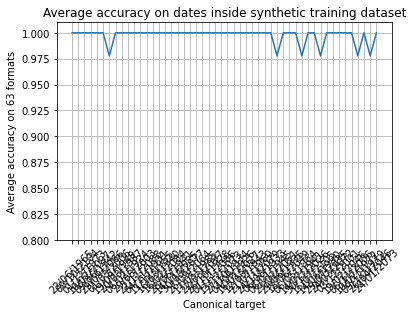

In [0]:
plt.plot(dates,accs)
plt.xticks(rotation=45)
plt.grid()
plt.ylim([0.8, 1.01])
plt.ylabel('Average accuracy on 63 formats')
plt.xlabel('Canonical target')
plt.title('Average accuracy on dates inside synthetic training dataset')
print('Average of average accuracies: ',np.mean(accs))

## Below dataset

Dates lower than the synthetic dataset used for test and eval.

In [0]:
accs = []
dates = []

new_dataset = DateTextGenerator('01/01/1900','31/12/1920')

new_df = new_dataset.generate_date_dataset()
sampled_test = sample(list(new_df['Target'].values),50)

print('acc test set: ',sampled_test)

for date_sample in sampled_test:
  accs.append(evaluate_for_a_same_date(date_sample,verbose=False))
  dates.append(date_sample)
  

acc test set:  ['15/07/1902', '05/01/1903', '13/04/1904', '18/09/1918', '10/09/1913', '10/11/1913', '09/05/1916', '20/08/1905', '07/06/1902', '28/10/1916', '22/12/1917', '14/01/1911', '26/02/1909', '30/05/1908', '15/08/1900', '08/01/1912', '23/10/1903', '29/03/1900', '02/01/1920', '01/12/1911', '03/09/1902', '27/02/1920', '13/01/1908', '27/11/1911', '27/04/1902', '14/09/1901', '03/09/1915', '27/10/1917', '26/04/1900', '03/02/1913', '12/09/1903', '26/03/1903', '03/08/1915', '30/10/1911', '25/10/1907', '02/05/1918', '12/07/1914', '11/07/1916', '12/04/1913', '10/05/1908', '20/02/1900', '20/12/1906', '19/07/1916', '10/11/1908', '11/10/1917', '25/07/1920', '26/04/1917', '31/07/1914', '14/06/1904', '07/08/1916']


Average of average accuracies:  0.7879999999999999


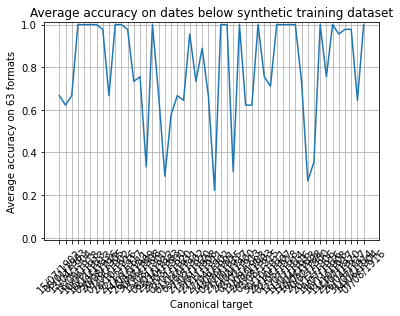

In [0]:
plt.plot(dates,accs)
plt.xticks(rotation=45)
plt.grid()
plt.ylim([-0.01, 1.01])
plt.ylabel('Average accuracy on 63 formats')
plt.xlabel('Canonical target')
plt.title('Average accuracy on dates below synthetic training dataset')
print('Average of average accuracies: ',np.mean(accs))

## Above dataset

Dates greater than the synthetic dataset used for test and eval.

In [0]:
accs = []
dates = []

new_dataset = DateTextGenerator('01/01/2121','31/12/2140')

new_df = new_dataset.generate_date_dataset()
sampled_test = sample(list(new_df['Target'].values),50)

print('acc test set: ',sampled_test)

for date_sample in sampled_test:
  accs.append(evaluate_for_a_same_date(date_sample,verbose=False))
  dates.append(date_sample)
  

acc test set:  ['27/08/2123', '18/05/2133', '10/12/2131', '25/02/2130', '09/05/2123', '01/05/2128', '26/09/2131', '31/08/2133', '25/07/2122', '20/01/2128', '27/01/2139', '30/10/2121', '09/11/2139', '04/04/2136', '20/11/2134', '15/05/2122', '29/08/2139', '17/03/2134', '01/08/2124', '04/02/2137', '28/07/2121', '14/11/2125', '01/05/2123', '27/12/2126', '05/01/2135', '17/07/2124', '24/08/2122', '20/08/2131', '05/01/2121', '17/09/2140', '04/12/2132', '29/05/2129', '07/07/2138', '26/05/2131', '25/12/2121', '17/05/2137', '19/12/2123', '23/03/2129', '30/12/2135', '23/10/2128', '02/05/2131', '25/01/2136', '06/07/2131', '18/11/2124', '18/05/2121', '05/11/2138', '04/03/2139', '23/10/2139', '17/08/2125', '02/10/2127']


Average of average accuracies:  0.7226666666666667


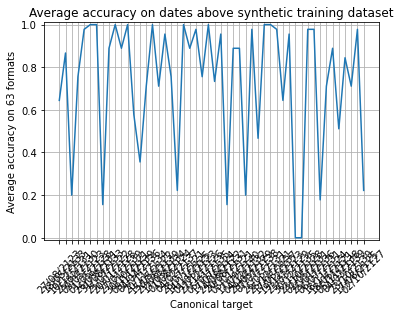

In [0]:
plt.plot(dates,accs)
plt.xticks(rotation=45)
plt.grid()
plt.ylim([-0.01, 1.01])
plt.ylabel('Average accuracy on 63 formats')
plt.xlabel('Canonical target')
plt.title('Average accuracy on dates above synthetic training dataset')
print('Average of average accuracies: ',np.mean(accs))

# The End